<a href="https://colab.research.google.com/github/Zion-Ma/Word_Embedding_Exp/blob/main/word_embedding_with_gensim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Data Preporcessing Practice

In [ ]:
sent = ["This is the first sentence for word2vec.",
        "This is the second sentence.",
        "Yet another sentence",
        "One more sentence",
        "And the final sentence"]

def clean_doc(doc):
  # split into words
  tokens = word_tokenize(doc)
  # convert to lower case
  tokens = [w.lower() for w in tokens]
  # prepare regex for char filtering
  re_punc = re.compile('[%s]' % re.escape(string.punctuation))
  # remove punctuation from each word
  stripped = [re_punc.sub('', w) for w in tokens]
  tokens = [word for word in stripped if not (word in string.punctuation)]
  return tokens

sentences = []
for sen in sent:
  sentences.append(clean_doc(sen))

sentences

[['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
 ['this', 'is', 'the', 'second', 'sentence'],
 ['yet', 'another', 'sentence'],
 ['one', 'more', 'sentence'],
 ['and', 'the', 'final', 'sentence']]

# Gensim Word2Vector

 Gensim provides the
Word2Vec class for working with a Word2Vec model. Learning a word embedding from text
involves loading and organizing the text into sentences and providing them to the constructor
of a new Word2Vec() instance

After the model is trained, it is accessible via the wv attribute. This is the
actual word vector model in which queries can be made.

Finally, a trained model can then be saved to file by calling the save word2vec format()
function on the word vector model. By default, the model is saved in a binary format to save
space.

We can tie all of this together with a worked example. Rather than loading a large text
document or corpus from file, we will work with a small, in-memory list of pre-tokenized
sentences. The model is trained and the minimum count for words is set to 1 so that no words
are ignored. After the model is learned, we summarize, print the vocabulary, then print a single
vector for the word “sentence”. Finally, the model is saved to a file in binary format, loaded,
and then summarized.

In [ ]:
from gensim.models import Word2Vec

# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
# print(model.wv.__getitem__("sentence"))
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)
['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']
Word2Vec(vocab=14, size=100, alpha=0.025)


After you learn word embedding for your text data, it can be nice to explore it with visualization.
You can use classical projection methods to reduce the high-dimensional word vectors to twodimensional plots and plot them on a graph. The visualizations can provide a qualitative
diagnostic for your learned model.

We can create a 2-dimensional PCA model of the word vectors using the scikit-learn PCA class.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


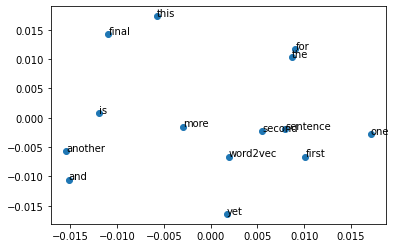

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
  pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()


# Google’s Word2Vec Embedding

In [ ]:
# ! gunzip /content/drive/MyDrive/2022_NLP/GoogleNews-vectors-negative300.bin.gz

In [ ]:
''' Google Word2Vector, too large for Colab'''

# from gensim.models import KeyedVectors

# filename = '/content/drive/MyDrive/2022_NLP/GoogleNews-vectors-negative300.bin'
# model = KeyedVectors.load_word2vec_format(filename, binary=True)
# result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
# print(result)

' Google Word2Vector, too large for Colab'

# Stanford’s GloVe Embedding

Like Word2Vec, the GloVe researchers also provide pre-trained word vectors, in this case, a
great selection to choose from. You can download the GloVe pre-trained word vectors and load
12.7. Load Stanford’s GloVe Embedding 130
them easily with Gensim. The first step is to convert the GloVe file format to the Word2Vec file
format. The only difference is the addition of a small header line. This can be done by calling
the glove2word2vec() function. 

Once converted, the file can be loaded just like Word2Vec file above. Let’s make this concrete
with an example. You can download the smallest GloVe pre-trained model from the GloVe
website. It an 822 Megabyte zip file with 4 different models (50, 100, 200 and 300-dimensional
vectors) trained on Wikipedia data with 6 billion tokens and a 400,000 word vocabulary. 

You now have a copy of the GloVe model in Word2Vec format with the filename
glove.6B.100d.txt.word2vec. Now we can load it and perform the same (king - man) +
woman = ? test as in the previous section. The complete code listing is provided below. Note
that the converted file is ASCII format, not binary, so we set binary=False when loading.


In [ ]:
# ! wget http://nlp.stanford.edu/data/glove.6B.zip
# ! unzip glove.6B.zip

--2022-11-20 14:08:45--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-11-20 14:08:45--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-11-20 14:08:45--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

gl

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec

glove_input_file = '/content/glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)


(400000, 100)

In [ ]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = '/content/glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)


[('queen', 0.7698541283607483)]


In [ ]:
result = model.most_similar(positive=['man', 'alcohol'], negative=['beer'], topn=1)
print(result)

[('victim', 0.6988980770111084)]


In [ ]:
# ! mv /content/glove.6B.100d.txt /content/drive/MyDrive/2022_NLP/GloVe/
# ! mv /content/glove.6B.100d.txt.word2vec /content/drive/MyDrive/2022_NLP/GloVe/
# ! mv /content/glove.6B.200d.txt /content/drive/MyDrive/2022_NLP/GloVe/
# ! mv /content/glove.6B.300d.txt /content/drive/MyDrive/2022_NLP/GloVe/
# ! mv /content/glove.6B.50d.txt /content/drive/MyDrive/2022_NLP/GloVe/